In [24]:
import pandas as pd
import numpy as np 
from scipy import stats

%matplotlib inline

In [69]:
def bounded_sigmoid(x_min, x_max, shape, incrementing=True):
    """
    Builds a S-shape curve that evolve from 0 to 1 (if incrementing) or 1 to 0 (otherwise)
    between x_min and x_max.
    
    This is preferable to the logitic function for cases where we want to make sure that the curve
    actually reaches 0 and 1 at some point (e.g. probability of triggering an "restock" action
    must be 1 if stock is as low as 1). 
    """
    
    def f(x):
        if x < x_min:
            return f(x_min)
        
        if x > x_max: 
            return f(x_max)
        
        if incrementing:
            return stats.beta.cdf( (x-x_min)/(x_max-x_min), a=shape, b=shape)
        else:
            return stats.beta.sf( (x-x_min)/(x_max-x_min), a=shape, b=shape)
    
    return f

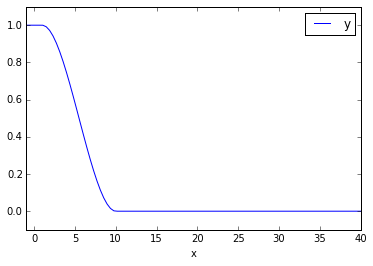

In [71]:
#response = bounded_sigmoid(1, 30, 2, incrementing=False)
response = bounded_sigmoid(x_min=1, x_max=10, shape=2, incrementing=False)

xs = np.linspace(-1, 40, 100)

pd.DataFrame({"x":xs, 
              "y":[response(x) for x in xs]}).plot(x="x", y="y", kind="line", ylim=[-.1, 1.1]);

In [72]:
response(10)

0.0

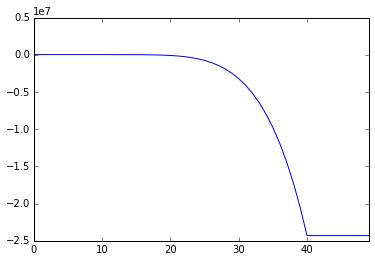

In [23]:
k1=5
k2=3
x_0=30 


pd.Series([s(x) for x in range(-10, 40)]).plot()